In [432]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- RunB 6um
- RunD 20um
- RunE 50um particles

In [433]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [434]:
from monetio.models import hysplit

In [435]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [436]:
from utilvolc.ashapp import ashinverse

In [437]:
os.chdir('/hysplit-users/alicec/projects/bezy/notebooks/')
projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='P'
#ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
#ens.append('gec00')
#ens=['gep04','gep03']
ens=['B','D','E']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}.nc'.format(x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'Run{}'.format(tag))
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'Run{}'.format(tag))
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [438]:
temp = xr.open_dataset(tdirlist[0]+'/'+fnamelist[0])

In [439]:
temp = temp[list(temp.data_vars.keys())[0]]
temp.rename('pall')

<xarray.DataArray 'pall' (source: 1, ens: 66, time: 17, z: 10, y: 110, x: 87)>
[107375400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * y          (y) int64 376 377 378 379 380 381 382 ... 480 481 482 483 484 485
  * x          (x) int64 866 867 868 869 870 871 872 ... 947 948 949 950 951 952
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  * source     (source) object 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes: (12/40)
    mult:                     1
    HYSPLIT_DIR:              /hysplit-users/alicec/FBamcArea/
    MAP_DIR:                  /hysplit-users/alicec/hysplit.v5.0.0/graphics/
    WORK_DIR:                 /hysplit-users/alicec/tmp/
    CONVERT_EXE:              convert
    PYTHON_EXE:               /hysplit-users/alicec/anaconda3/envs/hysplit/bi...
    ...                       ...
    spatialPlotRadius:        500.0
    graphicsResolution:       200
    zip_compression_level:    3
    rate:                     1
    timeres:                  1
    inv_vertical_resolution:  1000

# Create Instance of InverseAshPartEns

In [440]:
%autoreload
inverse = ai.InverseAshPartEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile)

appending  ('/hysplit-users/alicec/projects/bezy/data', 'xrfile.invbezyB.nc')
<xarray.DataArray 'pall' (source: 1, ens: 66, time: 17, z: 10, y: 110, x: 87)>
[107375400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * y          (y) int64 376 377 378 379 380 381 382 ... 480 481 482 483 484 485
  * x          (x) int64 866 867 868 869 870 871 872 ... 947 948 949 950 951 952
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  * source     (source) object 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes: (12/40)
    mult:                     1
    HYSPLIT_DIR:              /hysplit-users/alicec/FBamcArea/
    MAP_DIR:                  /hysplit-users/alicec/hysplit.v5.0.0/graphics/
    WORK_DIR:                 /hysplit-users/alicec/tmp/
    CONVERT_EXE:              c

In [441]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [442]:
# initiate the InverseAshEns object
#%autoreload
#inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [636]:
#print(inverse.invlist[0].get_time(2))
print(inverse.invlist[0].get_time(4))

2020-10-21 23:00:00


In [444]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunP
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunP
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [445]:
inverse.invlist[0].cdump.z.values[1:]

array([ 3047,  4571,  6095,  7619,  9143, 10667, 12191, 13715, 15239])

In [681]:
# add in the relavant VOLCAT observations
%autoreload
zvals = list(inverse.invlist[0].cdump.z.values[0:])
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange,zvals=zvals)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


10 P
tii 10


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


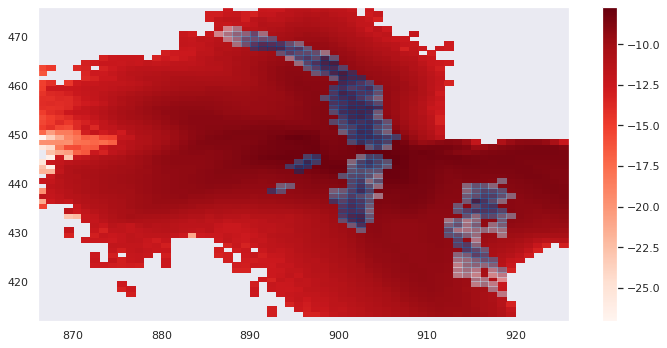

In [682]:
%autoreload
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index 'ensemble'
           #if None then sum along the ens. dimension which shows contributions from all inv. runs.
tii=10
#zlevel=None
%autoreload
ax = inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel)
#plt.gca()
#ax.plot(160.587,55.978,'y^')
#plt.show()


# Automatic Runs

In [448]:
def makerun(tii,remove_cols, remove_rows, remove_sources,remove_ncs):
    print("HERE HERE HERE")
    inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
    runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    inverse.set_subdirectory(runtag)
    print('HERE', inverse.subdir)
    tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
    inverse.run_tcm()
    
    eii=None
    unit='g/h'
    unit='kg/s'
    inverse.plot_outdat_ts(eii,unit=unit)
    #plt.show()
    #inverse.plot_outdat_ts(eii,profile=True)
    inverse.save_emis(runtag+'.csv')


## Run with all previous and just two previous

tii [2, 3]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5
(3021, 177)
N_ctrl 176
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if remove_cols:
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:917: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nmax = t3.shape[1]
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:931: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if remove_cols:
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:917: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
tii [2, 3, 4]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
(5542, 188)
N_ctrl 187
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
tii [2, 3, 4, 5]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5
(8685, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
tii [2, 3, 4, 5, 6]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5
(12278, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
tii [2, 3, 4, 5, 6, 7]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5
(15808, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5
(19274, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5
(22703, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:931: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:932: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:931: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return t3, lat, lon
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:932: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5
(26136, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
tii [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if remove_cols:
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:917: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nmax = t3.shape[1]
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:931: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' w

HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5
(29939, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/RunP_2_3_4_5_6_7_8_9_10_11_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/RunP_2_3_4_5_6_7_8_9_10_11_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5
(3021, 177)
N_ctrl 176
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
HERE HERE HERE
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_3_4_TFw5
(4317, 188)
N_ctrl 187
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_3_4_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_3_4_TFw5/RunP_3_4_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_3_4_TFw5/RunP_3_4_TFw5.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_TFw5
(5664, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_TFw5/RunP_4_5_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_TFw5/RunP_4_5_TFw5.csv
HERE HERE HERE
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_5_6_TFw5
(6736, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_5_6_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_5_6_TFw5/RunP_5_6_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_5_6_TFw5/RunP_5_6_TFw5.csv
HERE HERE HERE
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_6_7_TFw5
(7123, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_6_7_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_6_7_TFw5/RunP_6_7_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_6_7_TFw5/RunP_6_7_TFw5.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw5
(6996, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw5/RunP_7_8_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw5/RunP_7_8_TFw5.csv
HERE HERE HERE
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_8_9_TFw5
(6895, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_8_9_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_8_9_TFw5/RunP_8_9_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_8_9_TFw5/RunP_8_9_TFw5.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_TFw5
(6862, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:916: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_TFw5/RunP_9_10_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_TFw5/RunP_9_10_TFw5.csv
HERE HERE HERE
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_10_11_TFw5
(7236, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_10_11_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:653: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ilist = self.read_outdat(eii)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1889: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cmlist = cm()


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_10_11_TFw5/RunP_10_11_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_10_11_TFw5/RunP_10_11_TFw5.csv


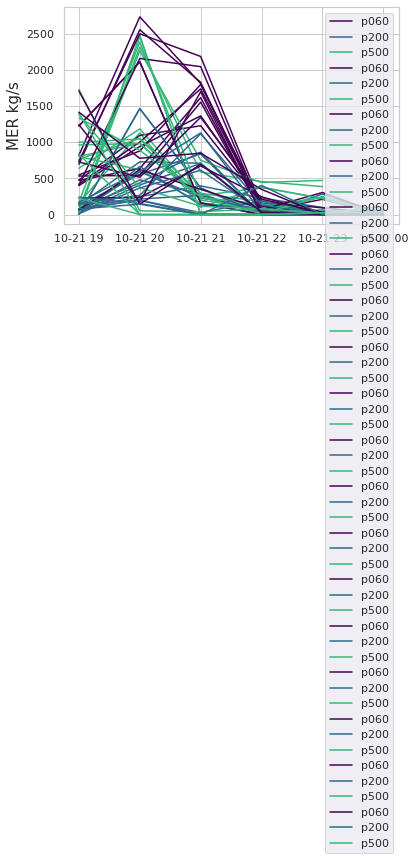

In [715]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.

%autoreload

tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    print('tii', tii)
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

tiilist = [[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    #inverse.make_efile(vloc=vloc)
    #inverse.run_hysplit()

## For comparision with RunC

HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5
(3021, 177)
N_ctrl 176
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TFw5/RunP_2_3_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5
(5542, 188)
N_ctrl 187
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TFw5/RunP_2_3_4_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5
(8685, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/RunP_2_3_4_5_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5
(12278, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TFw5/RunP_2_3_4_5_6_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5
(15808, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TFw5/RunP_2_3_4_5_6_7_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5
(19274, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TFw5/RunP_2_3_4_5_6_7_8_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5
(22703, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:936: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)


P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TFw5/RunP_2_3_4_5_6_7_8_9_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5
(26136, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TFw5/RunP_2_3_4_5_6_7_8_9_10_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5
(29939, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/RunP_2_3_4_5_6_7_8_9_10_11_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw5/RunP_2_3_4_5_6_7_8_9_10_11_TFw5.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TFw5
(9257, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TFw5/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TFw5/RunP_4_5_6_TFw5.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TFw5/RunP_4_5_6_TFw5.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TT
(202, 177)
N_ctrl 176
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TT/RunP_2_3_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TT/RunP_2_3_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TT
(421, 188)
N_ctrl 187
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TT/RunP_2_3_4_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TT/RunP_2_3_4_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TT
(575, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TT/RunP_2_3_4_5_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TT/RunP_2_3_4_5_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TT
(812, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TT/RunP_2_3_4_5_6_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TT/RunP_2_3_4_5_6_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TT
(1083, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TT/RunP_2_3_4_5_6_7_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TT/RunP_2_3_4_5_6_7_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TT
(1395, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TT/RunP_2_3_4_5_6_7_8_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TT/RunP_2_3_4_5_6_7_8_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TT
(1705, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TT/RunP_2_3_4_5_6_7_8_9_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TT/RunP_2_3_4_5_6_7_8_9_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TT
(2022, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TT/RunP_2_3_4_5_6_7_8_9_10_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TT/RunP_2_3_4_5_6_7_8_9_10_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT
(2353, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/RunP_2_3_4_5_6_7_8_9_10_11_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/RunP_2_3_4_5_6_7_8_9_10_11_TT.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TT
(610, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TT/RunP_4_5_6_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TT/RunP_4_5_6_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TF
(3283, 177)
N_ctrl 176
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TF/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TF/RunP_2_3_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_TF/RunP_2_3_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TF
(6019, 188)
N_ctrl 187
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TF/RunP_2_3_4_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_TF/RunP_2_3_4_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TF
(9439, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TF/RunP_2_3_4_5_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TF/RunP_2_3_4_5_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TF
(13343, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TF/RunP_2_3_4_5_6_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_TF/RunP_2_3_4_5_6_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TF
(17247, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TF/RunP_2_3_4_5_6_7_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_TF/RunP_2_3_4_5_6_7_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TF
(21151, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TF/RunP_2_3_4_5_6_7_8_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_TF/RunP_2_3_4_5_6_7_8_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TF
(25055, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TF/RunP_2_3_4_5_6_7_8_9_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_TF/RunP_2_3_4_5_6_7_8_9_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TF
(29020, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TF/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:936: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)


P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TF/RunP_2_3_4_5_6_7_8_9_10_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_TF/RunP_2_3_4_5_6_7_8_9_10_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF
(33367, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/RunP_2_3_4_5_6_7_8_9_10_11_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/RunP_2_3_4_5_6_7_8_9_10_11_TF.csv
HERE HERE HERE
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TF
(10060, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TF/RunP_4_5_6_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_4_5_6_TF/RunP_4_5_6_TF.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw7
(6662, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw7/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw7/RunP_7_8_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TFw7/RunP_7_8_TFw7.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TFw7
(9985, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TFw7/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TFw7/RunP_9_10_11_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TFw7/RunP_9_10_11_TFw7.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw7
(28414, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw7/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw7/RunP_2_3_4_5_6_7_8_9_10_11_TFw7.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TFw7/RunP_2_3_4_5_6_7_8_9_10_11_TFw7.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TT
(583, 198)
N_ctrl 197
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TT/RunP_7_8_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TT/RunP_7_8_TT.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TT
(958, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TT/RunP_9_10_11_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TT/RunP_9_10_11_TT.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT
(2353, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/RunP_2_3_4_5_6_7_8_9_10_11_TT.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TT/RunP_2_3_4_5_6_7_8_9_10_11_TT.csv
HERE HERE HERE
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TF
(7808, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-o

<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TF/RunP_7_8_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_7_8_TF/RunP_7_8_TF.csv
HERE HERE HERE
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TF
(12216, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TF/runP4.tcm_P.txt
P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TF/RunP_9_10_11_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_9_10_11_TF/RunP_9_10_11_TF.csv
HERE HERE HERE
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000
2020-10-22T01:00:00.000000000
2020-10-22T02:00:00.000000000
2020-10-22T03:00:00.000000000
2020-10-22T04:00:00.000000000
2020-10-22T05:00:00.000000000
2020-10-22T06:00:00.000000000
HERE /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF
(33367, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/runP4.tcm_P.txt


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.latlist = np.array(latlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, yo

P


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:657: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1894: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778
saving emissions
saving emissions  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/RunP_2_3_4_5_6_7_8_9_10_11_TF.csv
saving  emissions to  /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_6_7_8_9_10_11_TF/RunP_2_3_4_5_6_7_8_9_10_11_TF.csv


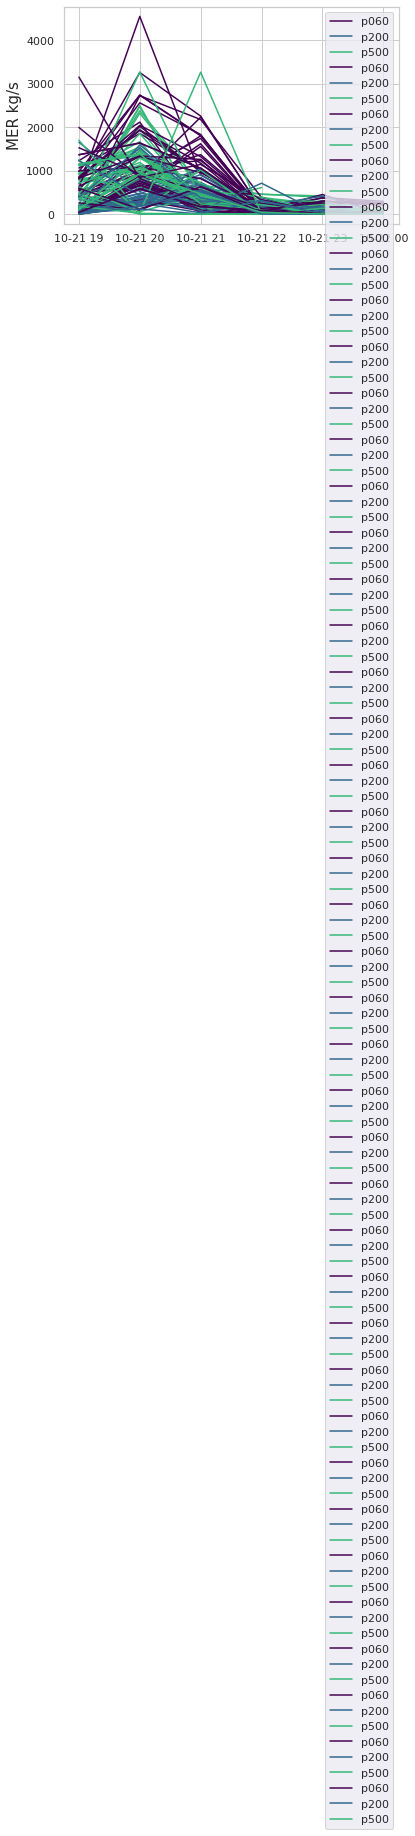

In [720]:
%autoreload
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11],
           [4,5,6]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
    
    
tiilist = [[7,8],[9,10,11],[2,3,4,5,6,7,8,9,10,11]]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=7
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=True
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)
remove_rows=False
remove_ncs=0
for tii in tiilist:
    makerun(tii,remove_cols,remove_rows,remove_sources,remove_ncs)  
    

# Looking at individual inversions

In [724]:
%autoreload
tii = [2,3,4,5]  #times to assimilate in inversion algorithm.
remove_cols=True    # removes columns with no model values in them.
remove_rows=False    # removes clear sky observations
remove_sources = False
remove_ncs=5
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-22T00:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:922: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if remove_cols:
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:936: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'd

In [725]:
print(runtag)

RunP_2_3_4_5_TFw5


In [726]:
numpar = 20000  # number of particles released per hour.
delt = 5 # time step
tave = 1 # 1 h time average
hres = 0.1 # 0.1 degree horizontal resolution.
rate = 1 # 1 unit mass per hour
particle_mass = rate / numpar  #how much unit mass each particle has
area = (hres * 111e3)**2  # area in meters squared for mass loading grid.
mass_one = particle_mass / area  # unit mass / m2 for one particle in grid box.
mass_one_one = mass_one / (tave*60 / delt)  # smallest mass loading possible with one particle for one time step
print(mass_one_one)  # one particle for one time step
print(mass_one)      # one particle in area.

3.381760138516895e-14
4.0581121662202745e-13


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1076: RuntimeWarning: divide by zero encountered in log10
  plt.colorbar(cb)


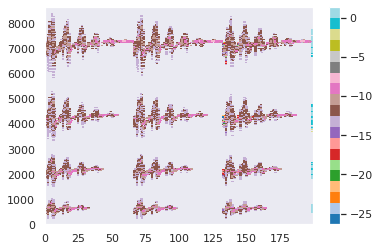

(8685, 199)

In [727]:
%autoreload
inverse.plot_tcm()
inverse.invlist[0].tcm.shape


In [728]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)
#subdir='/hysplit-users/alicec/projects/bezy/RunP/' + runtag
#subdir

'/hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5'

In [729]:
subdir

'/hysplit-users/alicec/projects/bezy/RunP/RunP_4_TFw5'

In [730]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(8685, 199)
N_ctrl 198
output file /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/runP4.tcm_P.txt


In [731]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

P


In [732]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

In [733]:
10**0.0007

1.001613109228309

In [734]:
inverse.taglist

['P']

('P_out.dat', 'P_out2.dat')
P


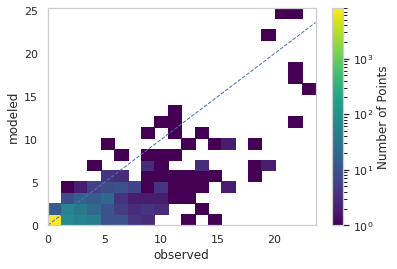

In [735]:
%autoreload
inverse.plot_outdat(eii=0)

('P_out.dat', 'P_out2.dat')
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
440154
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
30678D
<class 'numpy.datetime64'> 2020-10-21T19:00:00.000000000
35B778


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1895: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if isinstance(dfdat,str):


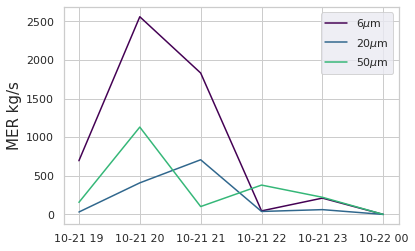

('P_out.dat', 'P_out2.dat')


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:1857: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if isinstance(dfdat,str):


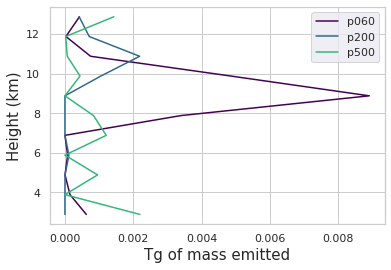

In [739]:
%autoreload

eii=0
unit='g/h'
unit='kg/s'
ax = inverse.plot_outdat_ts(eii,unit=unit)
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles,['6$\mu$m','20$\mu$m','50$\mu$m'])
plt.show()

inverse.plot_outdat_ts(eii,profile=True)
plt.savefig(runtag + '.png')
#inverse.save_emis(runtag+'.csv')
#ax = plt.gca()
#ax.set_ylim(0,10000)

P


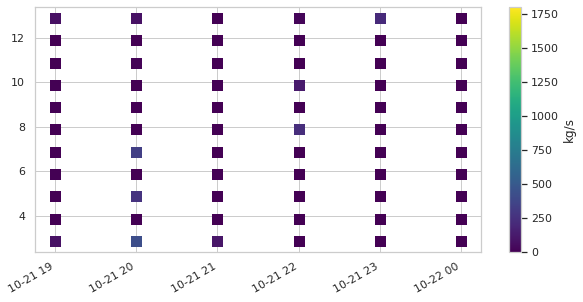

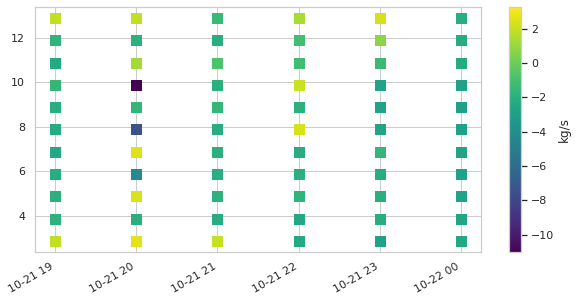

In [696]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [701]:
df = ilist[iii].get_emis()

In [714]:
dfdat = inverse.invlist[0].make_outdat_df(df,part='basic')
dtest = dfdat.groupby(['date','ht']).sum()
dtest.reset_index()
#dfdat.pivot(columns='date',index='ht')

,date,ht,mass
0,2020-10-21 19:00:00,2880.0,2.940540e+08
1,2020-10-21 19:00:00,3880.0,9.764018e+04
2,2020-10-21 19:00:00,4880.0,1.171375e+05
3,2020-10-21 19:00:00,5880.0,7.896715e+07
4,2020-10-21 19:00:00,6880.0,7.302919e+04
...,...,...,...
61,2020-10-22 00:00:00,8880.0,1.607779e+04
62,2020-10-22 00:00:00,9880.0,2.022935e+04
63,2020-10-22 00:00:00,10880.0,5.778273e+04
64,2020-10-22 00:00:00,11880.0,8.490186e+04


# checking the directories

In [434]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunB
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_TFw5
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


# Working on making EMIT file

In [697]:
%autoreload
inverse.add_phash()

In [698]:
inverse.phash.values()

dict_values([1, 2, 3])

In [699]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
# Note that warning that meteorological files not found is ok.
efile = inverse.make_efile(vloc=vloc)
efile.write_new('test.txt')

using particle size  {'p060': 1, 'p200': 2, 'p500': 3}
writing efile {} /hysplit-users/alicec/projects/bezy/RunP/RunP_2_3_4_5_TFw5/P_emit.txt
HERE
HERE
HERE


GFS0p25
fcst str /pub/forecast/%Y%m%d/
making control file  gfs0p25
/hysplit-users/alicec/projects/bezy/data/
fcst str /hysplit-users/alicec/projects/bezy/data/%Y%m%d/
WARNING /hysplit-users/alicec/projects/bezy/data/20201021/hysplit.t18z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t00z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t06z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t12z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201022/hysplit.t18z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201023/hysplit.t00z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/20201023/hysplit.t06z.gfs0p25f meteorological file does not exist
WARNING /hysplit-users/alic

In [658]:
%autoreload
ecycle = efile.cycle_list[-1]
ecycle.sort()
print(ecycle.splist)
erec = ecycle.recordra
for iii in np.arange(0,len(erec)):
    print(erec[iii].spnum, '---', erec[iii],type(erec[iii].spnum))
#efile.write_new('temp.txt')

[1, 2, 3]
1 --- 2020 10 22 00 00 0100 55.9780 160.5870 2880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
2 --- 2020 10 22 00 00 0100 55.9780 160.5870 2880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
3 --- 2020 10 22 00 00 0100 55.9780 160.5870 2880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
1 --- 2020 10 22 00 00 0100 55.9780 160.5870 3880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
2 --- 2020 10 22 00 00 0100 55.9780 160.5870 3880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
3 --- 2020 10 22 00 00 0100 55.9780 160.5870 3880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
1 --- 2020 10 22 00 00 0100 55.9780 160.5870 4880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
2 --- 2020 10 22 00 00 0100 55.9780 160.5870 4880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
3 --- 2020 10 22 00 00 0100 55.9780 160.5870 4880.0 0.00e+00 7.85e+05 0.00e+00 
 <class 'numpy.int64'>
1 --- 2020 10 22 00 00 0100 55.9780 160.5870 5880.0 0.00e+00 7.

In [655]:
%autoreload
efile.write_new('efile.test')

HERE
HERE
HERE


In [700]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std P
in loop 0s procs 0


# Creating netcdf files from cdump

In [128]:
from monetio.models import hysplit
blist = []

cdir = '/hysplit-users/alicec/projects/bezy/RunH/'
tiilist = [[2,3],[2,3,4],[2,3,4,5],[2,3,4,5,6],[2,3,4,5,6,7],[2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],
           [2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]]
name='cdump.zy{}25'.format(tag)
runtag = []
tag='H'
for tii in tiilist:
    r = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    runtag.append(r)
    print(r)

for tagname in runtag:
    blist.append((os.path.join(cdir,tagname,name),'gfs0p25',tagname))

runtag=[]
tiilist = [[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
for tii in tiilist:
    r = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources,remove_ncs=remove_ncs)
    runtag.append(r)
    print(r)

for tagname in runtag:
    blist.append((os.path.join(cdir,tagname,name),'gfs0p25',tagname))

for b in blist: print(b)

RunH_2_3_TFw5
RunH_2_3_4_TFw5
RunH_2_3_4_5_TFw5
RunH_2_3_4_5_6_TFw5
RunH_2_3_4_5_6_7_TFw5
RunH_2_3_4_5_6_7_8_TFw5
RunH_2_3_4_5_6_7_8_9_TFw5
RunH_2_3_4_5_6_7_8_9_10_TFw5
RunH_2_3_4_5_6_7_8_9_10_11_TFw5
RunH_3_4_TFw5
RunH_4_5_TFw5
RunH_5_6_TFw5
RunH_6_7_TFw5
RunH_7_8_TFw5
RunH_8_9_TFw5
RunH_9_10_TFw5
RunH_10_11_TFw5
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_7_TFw5')
('/hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_TFw5/cdump.zyH25', 'gfs0p25', 'RunH_2_3_4_5_6_7_8_TFw5')
('/hysplit-users/alicec/projec

In [129]:
dset = hysplit.combine_dataset(blist,century=2000,verbose=True)
dset.to_netcdf('RunH_GFS.nc')


reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:00:00
sample time 2020-10-22 01:00:00  to  2020-10-22 01:00:00
sample time 2020-10-22 02:00:00  to  2020-10-22 02:00:00
sample time 2020-10-22 03:00:00  to  2020-10-22 03:00:00
sample time 2020-10-22 04:00:00  to  2020-10-22 04:00:00
sample time 2020-10-22 05:00:00  to  2020-10-22 05:00:00
sample time 2020-10-22 06:00:00  to  2020-10-22 06:00:00
sample time 2020-10-22 07:00:00  to  2020-10-22 07:00:00
sample time 2020-10-22 08:00:00  to  2020-10-22 08:00:00
sample time 2020-10-22 09:00:00  to  2020-10-22 09:00:00
sample time 2020-10-22 10:00:00  to  2020-10-22 10:00:00
sample time 2020-10-22 11:00:00  to  2020-10-22 11:00:00
sample time 2

sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:00:00
sample time 2020-10-22 01:00:00  to  2020-10-22 01:00:00
sample time 2020-10-22 02:00:00  to  2020-10-22 02:00:00
sample time 2020-10-22 03:00:00  to  2020-10-22 03:00:00
sample time 2020-10-22 04:00:00  to  2020-10-22 04:00:00
sample time 2020-10-22 05:00:00  to  2020-10-22 05:00:00
sample time 2020-10-22 06:00:00  to  2020-10-22 06:00:00
sampl

sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_2_3_4_5_6_7_8_9_10_11_TFw5/cdump.zyH25
sample time 2020-10-21 20:00:00  to  2020-10-21 20:00:00
sample time 2020-10-21 21:00:00  to  2020-10-21 21:00:00
sample time 2020-10-21 22:00:00  to  2020-10-21 22:00:00
sample time 2020-10-21 23:00:00  to  2020-10-21 23:00:00
sample time 2020-10-22 00:00:00  to  2020-10-22 00:0

sample time 2020-10-22 16:00:00  to  2020-10-22 16:00:00
sample time 2020-10-22 17:00:00  to  2020-10-22 17:00:00
sample time 2020-10-22 18:00:00  to  2020-10-22 18:00:00
sample time 2020-10-22 19:00:00  to  2020-10-22 19:00:00
sample time 2020-10-22 20:00:00  to  2020-10-22 20:00:00
sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00  to  2020-10-23 05:00:00
sample time 2020-10-23 06:00:00  to  2020-10-23 06:00:00
sample time 2020-10-23 07:00:00  to  2020-10-23 07:00:00
reading /hysplit-users/alicec/projects/bezy/RunH/RunH_6_7_TFw5/cdump.zyH25
sample time 2

sample time 2020-10-22 12:00:00  to  2020-10-22 12:00:00
sample time 2020-10-22 13:00:00  to  2020-10-22 13:00:00
sample time 2020-10-22 14:00:00  to  2020-10-22 14:00:00
sample time 2020-10-22 15:00:00  to  2020-10-22 15:00:00
sample time 2020-10-22 16:00:00  to  2020-10-22 16:00:00
sample time 2020-10-22 17:00:00  to  2020-10-22 17:00:00
sample time 2020-10-22 18:00:00  to  2020-10-22 18:00:00
sample time 2020-10-22 19:00:00  to  2020-10-22 19:00:00
sample time 2020-10-22 20:00:00  to  2020-10-22 20:00:00
sample time 2020-10-22 21:00:00  to  2020-10-22 21:00:00
sample time 2020-10-22 22:00:00  to  2020-10-22 22:00:00
sample time 2020-10-22 23:00:00  to  2020-10-22 23:00:00
sample time 2020-10-23 00:00:00  to  2020-10-23 00:00:00
sample time 2020-10-23 01:00:00  to  2020-10-23 01:00:00
sample time 2020-10-23 02:00:00  to  2020-10-23 02:00:00
sample time 2020-10-23 03:00:00  to  2020-10-23 03:00:00
sample time 2020-10-23 04:00:00  to  2020-10-23 04:00:00
sample time 2020-10-23 05:00:00

In [130]:
4.0/24.0

0.16666666666666666

In [133]:
print(tdirlist)
print(fnamelist)

['/hysplit-users/alicec/projects/bezy/data']
['xrfile.invbezyH25.nc']


In [222]:
x1 = xr.open_dataset('/hysplit-users/alicec/projects/bezy/data/xrfile.invbezyB.nc')
x2 = xr.open_dataset('/hysplit-users/alicec/projects/bezy/data/xrfile.invbezyC.nc')
x3 = xr.open_dataset('/hysplit-users/alicec/projects/bezy/data/xrfile.invbezyE.nc')

In [238]:
dv = list(x2.data_vars.keys())[0]
print(dv)

p060


In [225]:
%autoreload
ai.stack_psizes([x1.p060,x2.p060,x3.p500],['p060','p200','p500'])

p060
<class 'xarray.core.dataarray.DataArray'>
p200
<class 'xarray.core.dataarray.DataArray'>
p500
<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray 'p060' (time: 17, z: 10, y: 64, x: 61, ens: 198)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
...
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]]], dtype=float32)
Coordinates:
  * y          (y) int64 413 414 415 416 417 418 419 ... 471 472 473 474 475 476
  * x          (x) int64 866 867 868 869 870 871 872 ... 921 922 923 924 925 926
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
    source     (ens) <U13 'Line to 14 km' 'Line to 14 km' ... 'Line to 14 km'
    latitude   (y, x) float64 52.18 52.18 52.18 52.18 ... 58.48 58.48 58.48
    longitude  (y, x) float64 157.1 157.2 157.3 157.4 ... 162.9 163.0 163.1
  * ens        (ens) MultiIndex
  - ens1       (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  - psize      (ens) object 'p060' 'p060' 'p060' 'p060' ... 'p500' 'p500' 'p500'
Attributes: (12/40)
    mult:                     1
    HYSPLIT_DIR:              /hysplit-users/alicec/FBamcArea/
    MAP_DIR:                  /hysplit-users/alicec/hysplit.v5.0.0/graphics/
    WORK_DIR:                 /hysplit-users/alicec/tmp/
    CONVERT_EXE:              convert
    PYTHON_EXE:               /hysplit-users/alicec/anaconda3/envs/hysplit/bi...
    ...                       ...
    spatialPlotRadius:        500.0
    graphicsResolution:       200
    zip_compression_level:    3
    rate:                     1
    timeres:                  1
    inv_vertical_resolution:  1000

In [189]:
x1 = x1.isel(source=0)
#x1 = x1.assign_coords(psize='p060').expand_dims('psize')
#x1

In [190]:
x2 = x2.isel(source=0)
#x2 = x2.assign_coords(psize='p200').expand_dims('psize')

In [192]:
from utilhysplit.hysplit_gridutil import align_grids
x3, x4 = align_grids(x1,x2)
#x3 = x3.rename({'ens':'ens1'})
#x3 = x3.stack(ens=('ens1','psize'))
x4 = x4.assign_coords(psize='p200').expand_dims('psize')
x3 = x3.assign_coords(psize='p060').expand_dims('psize')

In [193]:
x3 = x3.rename({'ens':'ens1'})
x3 = x3.stack(ens=('ens1','psize'))


<xarray.Dataset>
Dimensions:    (ens: 66, time: 17, x: 95, y: 117, z: 10)
Coordinates:
  * x          (x) int64 865 866 867 868 869 870 871 ... 954 955 956 957 958 959
  * y          (y) int64 369 370 371 372 373 374 375 ... 480 481 482 483 484 485
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
    source     <U13 'Line to 14 km'
    latitude   (y, x) float64 47.78 47.78 47.78 47.78 ... 59.38 59.38 59.38
    longitude  (y, x) float64 157.0 157.1 157.2 157.3 ... 166.2 166.3 166.4
  * ens        (ens) MultiIndex
  - ens1       (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  - psize      (ens) object 'p060' 'p060' 'p060' 'p060' ... 'p060' 'p060' 'p060'
Data variables:
    p060       (time, z, y, x, ens) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    llcrnr latitude:    10.97800064086914
    llcrnr longitude:   70.58700561523438
    Latitude Spacing:   0.1
    Longitude Spacing:  0.1
    Number Lat Points:  489.0
    Number Lon Points:  963.0

In [194]:
x4 = x4.rename({'ens':'ens1'})
x4 = x4.stack(ens=('ens1','psize'))
x4

<xarray.Dataset>
Dimensions:    (ens: 66, time: 17, x: 95, y: 117, z: 10)
Coordinates:
  * x          (x) int64 865 866 867 868 869 870 871 ... 954 955 956 957 958 959
  * y          (y) int64 369 370 371 372 373 374 375 ... 480 481 482 483 484 485
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
    source     <U13 'Line to 13 km'
    latitude   (y, x) float64 47.78 47.78 47.78 47.78 ... 59.38 59.38 59.38
    longitude  (y, x) float64 157.0 157.1 157.2 157.3 ... 166.2 166.3 166.4
  * ens        (ens) MultiIndex
  - ens1       (ens) object '102119_2880' '102119_3880' ... '102200_12880'
  - psize      (ens) object 'p200' 'p200' 'p200' 'p200' ... 'p200' 'p200' 'p200'
Data variables:
    p060       (time, z, y, x, ens) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes:
    llcrnr latitude:    10.97800064086914
    llcrnr longitude:   70.58700561523438
    Latitude Spacing:   0.1
    Longitude Spacing:  0.1
    Number Lat Points:  489.0
    Number Lon Points:  963.0

In [195]:
xc= xr.concat([x3,x4],dim='ens')

In [197]:
xc.ens.values

array([('102119_2880', 'p060'), ('102119_3880', 'p060'),
       ('102119_4880', 'p060'), ('102119_5880', 'p060'),
       ('102119_6880', 'p060'), ('102119_7880', 'p060'),
       ('102119_8880', 'p060'), ('102119_9880', 'p060'),
       ('102119_10880', 'p060'), ('102119_11880', 'p060'),
       ('102119_12880', 'p060'), ('102120_2880', 'p060'),
       ('102120_3880', 'p060'), ('102120_4880', 'p060'),
       ('102120_5880', 'p060'), ('102120_6880', 'p060'),
       ('102120_7880', 'p060'), ('102120_8880', 'p060'),
       ('102120_9880', 'p060'), ('102120_10880', 'p060'),
       ('102120_11880', 'p060'), ('102120_12880', 'p060'),
       ('102121_2880', 'p060'), ('102121_3880', 'p060'),
       ('102121_4880', 'p060'), ('102121_5880', 'p060'),
       ('102121_6880', 'p060'), ('102121_7880', 'p060'),
       ('102121_8880', 'p060'), ('102121_9880', 'p060'),
       ('102121_10880', 'p060'), ('102121_11880', 'p060'),
       ('102121_12880', 'p060'), ('102122_2880', 'p060'),
       ('102122_3880',